In [1]:
import pickle, joblib
import numpy as np
from matplotlib.pyplot import *
import ROOT
import uproot
from tqdm import tqdm
from importlib import reload

import copy
import glob
from collections import namedtuple
particle = namedtuple('particle', ['X_S', 'Y_S', 'Z_S', 'X_END_S', 'Y_END_S', 'Z_END_S', 'PX_S', 'PY_S', 'PZ_S', 'PDG', 'TRACK', 'TRACK_PARENT', "TRACK_STATUS", 'entry'])

from muhelper.helper_pytracker import visualization
import muhelper
import tracker
%matplotlib inline

Welcome to JupyROOT 6.28/10


In [2]:
from tqdm import tqdm

In [3]:
# Total flux 0.00635307 [/cm2/s]
# Area radius: 350 cm
sim_rate = np.pi*350**2*0.00635307
sim_events = 360000
sim_time = sim_events/sim_rate
print("Muon rate [Hz]:", sim_rate)
print("Effective time of simulation [s]: ", sim_time)

Muon rate [Hz]: 2444.947859868359
Effective time of simulation [s]:  147.2424037784524


In [5]:
# Cut range for each layer [xlow, xhigh, zlow, zhigh]
# Direction: layer 4, z is perpendicular to the bar, z is short side
llength = 100/2
slength = 80/2
zoffset=9000
cut_range={4:[-llength, llength, -slength+zoffset, slength+zoffset],
           6:[-slength, slength, -llength+zoffset, llength+zoffset],
           7:[-llength, llength, -slength+zoffset, slength+zoffset],
           8:[-slength, slength, -llength+zoffset, llength+zoffset]}

In [6]:
filename = "/project/rrg-mdiamond/data/MATHUSLA/simulation/run-2024-07-teststand/DigiOutput/cosmic_run_0/0/stat0.root"
tfile = ROOT.TFile.Open(filename)
tree_names = [i.GetName() for i in  tfile.GetListOfKeys()]
ttree = tfile.Get(tree_names[0])
tentries = ttree.GetEntries()
branches = [ttree.GetListOfBranches()[i].GetName() for i in range(len(ttree.GetListOfBranches()))]

print("Entries:", tentries)
print(branches)

Entries: 343116
['NumHits', 'Hit_energy', 'Hit_time', 'Hit_Center1', 'Hit_Center2', 'Hit_bar_direction', 'Hit_layer_direction', 'Hit_LayerID', 'Hit_particlePdgId', 'Hit_G4TrackId', 'Hit_G4ParentTrackId', 'Hit_x', 'Hit_y', 'Hit_z', 'Hit_particleEnergy', 'Hit_particlePx', 'Hit_particlePy', 'Hit_particlePz', 'Hit_type', 'Digi_numHits', 'Digi_time', 'Digi_x', 'Digi_y', 'Digi_z', 'Digi_energy', 'Digi_px', 'Digi_py', 'Digi_pz', 'Digi_particle_energy', 'Digi_pdg_id', 'Digi_track_id', 'Digi_type', 'Digi_center1', 'Digi_center2', 'Digi_bar_direction', 'Digi_layer_direction', 'Digi_layer_id', 'Digi_det_id', 'Digi_seed', 'Digi_hitIndices', 'GenParticle_index', 'GenParticle_G4index', 'GenParticle_pdgid', 'GenParticle_time', 'GenParticle_x', 'GenParticle_y', 'GenParticle_z', 'GenParticle_energy', 'GenParticle_px', 'GenParticle_py', 'GenParticle_pz', 'GenParticle_mass']


In [7]:
valid_event_hits = []
for ev in tqdm(range(tentries)):
    ttree.GetEntry(ev)
    validhits=0
    
    for i in range(len(ttree.Digi_x)):
        if ttree.Digi_layer_id[i] in list(cut_range.keys()):
            cut=cut_range[ttree.Digi_layer_id[i]]
            if (ttree.Digi_x[i]>cut[0])&(ttree.Digi_x[i]<cut[1])&(ttree.Digi_z[i]>cut[2])&(ttree.Digi_z[i]<cut[3])&(ttree.Digi_track_id[i]==1):
                validhits+=1
    if validhits>=3:
        valid_event_hits.append(validhits)

100%|██████████| 343116/343116 [01:16<00:00, 4506.34it/s]


In [11]:
len(valid_event_hits)
expected_events_per_hour = len(valid_event_hits)/sim_time*3600
print("Expected events per hour", expected_events_per_hour)

Expected events per hour 44962.59114297912


[1348.    0.    0.    0.    0.    0.    0.    0.    0.    0.  484.    0.
    0.    0.    0.    0.    0.    0.    0.    7.]


Text(0.5, 0, 'Number of hits')

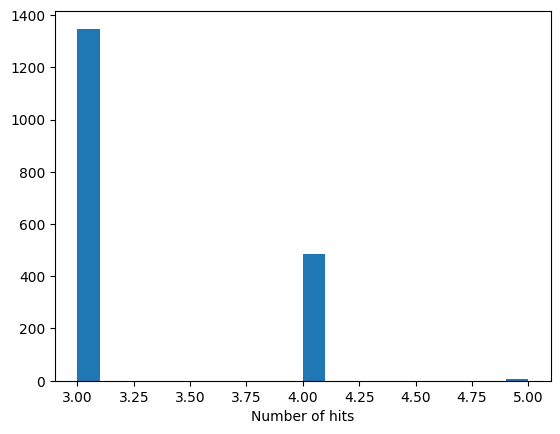

In [10]:
n,ibins, *_=hist(valid_event_hits, bins=20);
print(n)
xlabel("Number of hits")


In [32]:
# filename = "/project/rrg-mdiamond/data/MATHUSLA/simulation/run-2024-07-teststand/DigiOutput/cosmic_run_0/0/stat0.pkl"
# data=joblib.load(filename)

# x,y,z, layer=[],[],[],[]
# for ev in data["hits"]:
#     for hit in ev:
#         x.append(hit.x)
#         y.append(hit.y)
#         z.append(hit.z)
#         layer.append(hit.layer)
        
# x = np.array(x)
# layer=np.array(layer)

# hist(x[layer==5], bins=100, range=(0,300));
# show()
# scatter(z,x, alpha=0.1)
# show()
# scatter(y, layer)
# xlim(8547, 9000)
# show()

